In [1]:
import numpy as np

X = np.array([50,100,150,200,250])
y = np.array([10000,20000,30000,40000,50000])

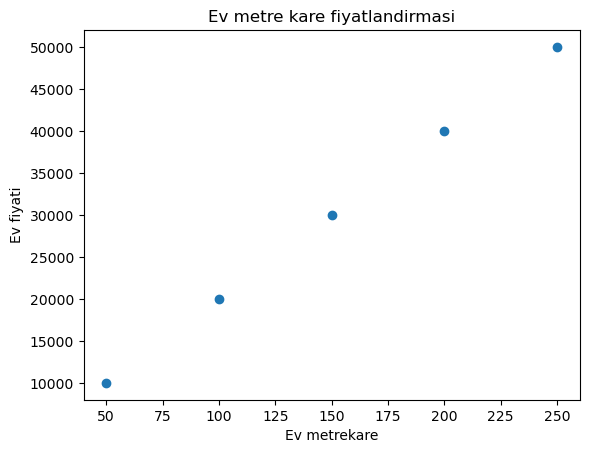

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.xlabel("Ev metrekare")
plt.ylabel("Ev fiyati")
plt.title("Ev metre kare fiyatlandirmasi")
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

#modeli olusturduk
model = LinearRegression()

#modeli egitiyoruz. X veri tek boyutlu olduğundan onu reshape() ile 2 boyutlu yapıyoruz
model.fit(X.reshape(-1,1),y)

LinearRegression()

In [7]:
ev_metrekare = 120

tahmin_fiyat = model.predict([[ev_metrekare]])
print(f"{ev_metrekare} metrekarelik evin tahmini fiyati: {tahmin_fiyat[0]:.2f}")

120 metrekarelik evin tahmini fiyati: 24000.00


In [8]:
#Baska veri setinde uygulama
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer = load_breast_cancer()
data = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
data["target"] = cancer.target
print(data.head(3))

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33            184.6      2019.0   
1                 0.05667  ...          23.41            158.8      1956.0   
2                 0.05999  ...          25.53            152.5      1709.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
#target sütununun kaldırmak için
X = data.drop("target", axis=1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model dogrulugu: ", accuracy)

Model dogrulugu:  0.956140350877193


C:\Users\batma\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


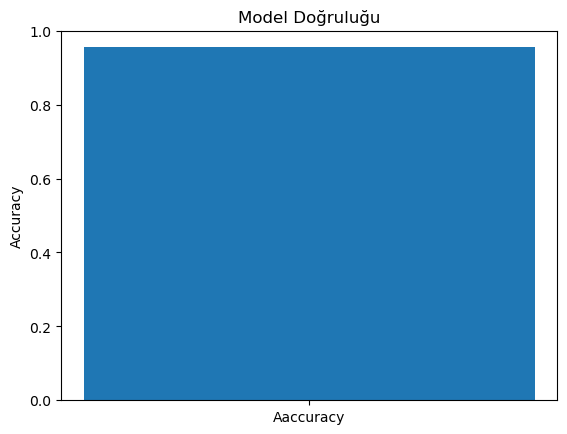

In [13]:
import matplotlib.pyplot as plt
plt.bar(["Aaccuracy"], [accuracy])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Model Doğruluğu")
plt.show()

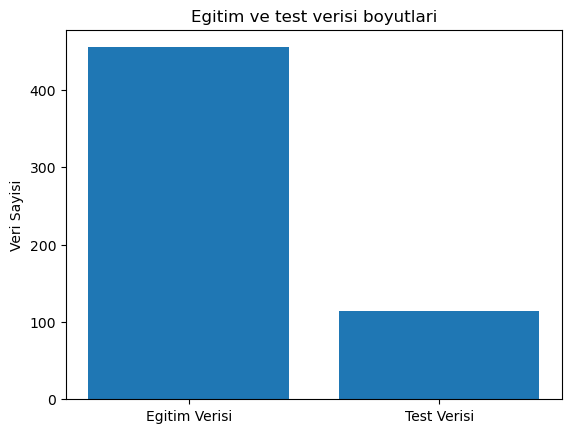

In [15]:
train_size = len(X_train)
test_size = len(X_test)
plt.bar(["Egitim Verisi", "Test Verisi"], [train_size,test_size])
plt.ylabel("Veri Sayisi")
plt.title("Egitim ve test verisi boyutlari")
plt.show()